<a href="https://colab.research.google.com/github/luisdem01/Quimica_general/blob/main/Cin%C3%A9tica_qu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cinética Química
Alumno: Angel Luis Kallpa De la Cruz Meza

In [ ]:
!pip install rdkit
!pip install pyscf

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

In [48]:
smiles_cis = "F\C=C/C"
cis = Chem.MolFromSmiles(smiles_cis)
cis = Chem.AddHs(cis)
Chem.AllChem.EmbedMolecule(cis)
Chem.MolToXYZFile(cis, "cis.xyz")

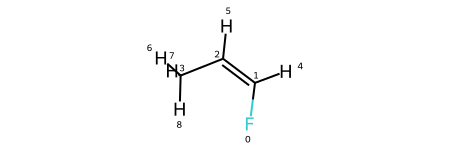

In [49]:
cis

In [52]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

9

F      1.140246   -1.591411    0.006305
C      1.309925   -0.251639   -0.095712
C      0.267271    0.536209   -0.072779
C     -1.116014   -0.012645    0.064376
H      2.316685    0.124832   -0.194000
H      0.380842    1.603794   -0.152492
H     -1.757868    0.560561   -0.607201
H     -1.394699    0.140035    1.142489
H     -1.146388   -1.109735   -0.090986


In [50]:
smiles_trans = "F/C=C/C"
trans = Chem.MolFromSmiles(smiles_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans)
Chem.MolToXYZFile(trans, "trans.xyz")


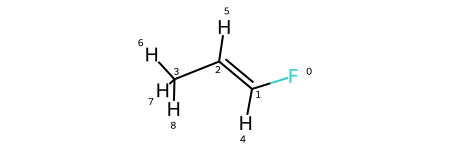

In [51]:
trans

In [36]:
!cat trans.xyz

9

F      2.583218   -1.257941   -2.352399
C      1.602373   -0.488710   -1.827558
C      0.466801   -0.261777   -2.451114
C     -0.558008    0.595547   -1.803234
H      1.752808   -0.035585   -0.848492
H      0.325373   -0.716843   -3.425519
H     -1.059092    0.004962   -1.010088
H     -0.016746    1.437523   -1.308818
H     -1.291538    1.013939   -2.519858


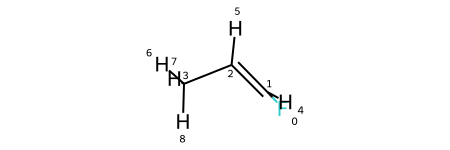

In [53]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro.xyz")
cis

In [54]:
!cat diedro.xyz

9

F      1.759740   -0.734162   -1.278516
C      1.309925   -0.251639   -0.095712
C      0.267271    0.536209   -0.072779
C     -1.116014   -0.012645    0.064376
H      1.836788   -0.539244    0.801314
H      0.380842    1.603794   -0.152492
H     -1.757868    0.560561   -0.607201
H     -1.394699    0.140035    1.142489
H     -1.146388   -1.109735   -0.090986


In [57]:
cis = gto.M(atom="cis.xyz")

cis.basis = "6-31g"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [58]:
resultado_cis = mf_cis.kernel()

converged SCF energy = -214.250904808457


In [59]:
cis_diedro = gto.M(atom="diedro.xyz")

cis_diedro.basis = "6-31G"
mf_diedro = cis_diedro.KS()
mf_diedro.xc = 'b3lyp'

In [60]:
resultado_cis_diedro = mf_diedro.kernel()

converged SCF energy = -214.081805983256


In [43]:
trans = gto.M(atom="trans.xyz")

trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [44]:
resultado_trans= mf_trans.kernel()

converged SCF energy = -214.250789328418


In [ ]:
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

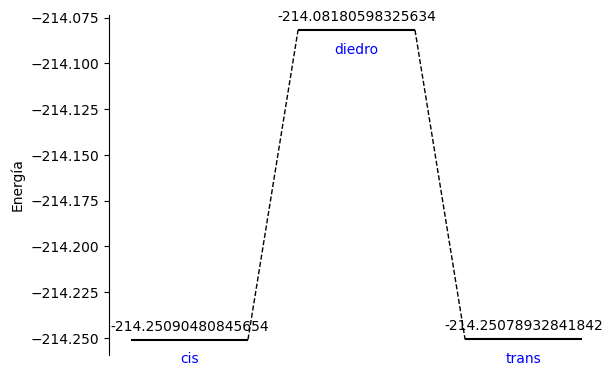

In [67]:
import matplotlib.pyplot as plt
from energydiagram import ED

diagram = ED()
diagram.add_level(resultado_cis,'cis')
diagram.add_level(resultado_cis_diedro,'diedro')
diagram.add_level(resultado_trans,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energía")

In [68]:
E_activacion = resultado_cis_diedro - resultado_cis
E_activacion

0.16909882520019437

In [69]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
